In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.duplicated().sum()

np.int64(0)

In [6]:
X=df.iloc[:,3:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


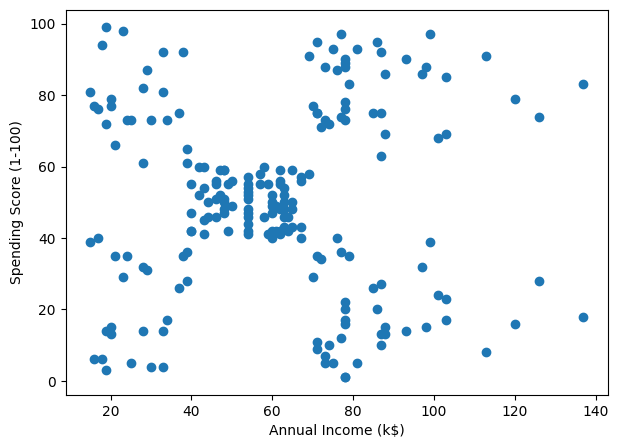

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [9]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(X_scaled)

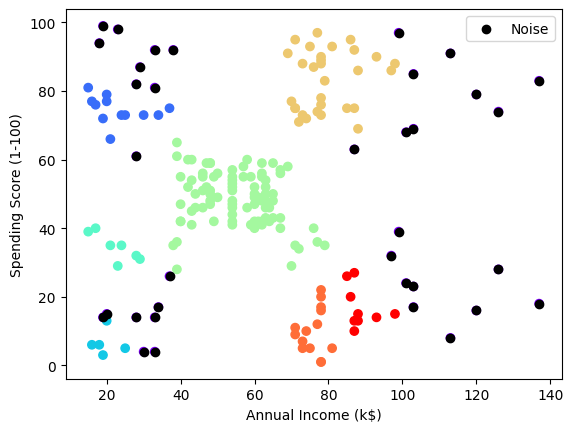

In [13]:
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=clusters,cmap='rainbow')
plt.scatter(X.iloc[clusters==-1]['Annual Income (k$)'],X.iloc[clusters==-1]['Spending Score (1-100)'],color='black',label='Noise')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
model = AgglomerativeClustering(
    n_clusters=5,
    linkage='ward'
)

labels = model.fit_predict(X_scaled)

score = silhouette_score(X_scaled, labels)

print("Silhouette Score:", score)



Silhouette Score: 0.5538089226688662


In [19]:
eps_values=[0.2,0.3,0.5]

for e in eps_values:
    print(f"\n Evaluating DBSCAN using eps={e}")

    dbscan=DBSCAN(eps=e,min_samples=5)
    labels=dbscan.fit_predict(X_scaled)

    unique_labels=set(labels)
    n_clusters=len(unique_labels)-(1 if -1 in unique_labels else 0)

    n_noise=list(labels).count(-1)
    noise_ratio=n_noise/len(labels)
    print(f'Number of Clusters: {n_clusters}')
    print(f'Number of Noise points: ',round(noise_ratio,2))
    if n_clusters>3:
        sc=silhouette_score(X_scaled,labels)
        print("Silhouette_score : ",sc)
    else:
        print("Silhouette score not applicable ")



 Evaluating DBSCAN using eps=0.2
Number of Clusters: 7
Number of Noise points:  0.39
Silhouette_score :  0.14057942679617558

 Evaluating DBSCAN using eps=0.3
Number of Clusters: 7
Number of Noise points:  0.17
Silhouette_score :  0.31614121976731185

 Evaluating DBSCAN using eps=0.5
Number of Clusters: 2
Number of Noise points:  0.04
Silhouette score not applicable 
